# Early Heart Failure Risk Prediction

# Problem Statement:
Heart failure is a significant health concern worldwide, with high morbidity and mortality rates. Early detection and prediction of heart failure can lead to better patient outcomes by enabling timely interventions and treatments. In this project, we aim to develop a predictive model that can accurately identify individuals at risk of heart failure based on their medical history and physiological measurements

# Project Objective:
The objective of this project is to build a machine learning model capable of predicting the likelihood of heart failure in patients using relevant medical features. By analyzing data such as red blood cell count, enzyme levels, comorbidities like diabetes and hypertension, and other physiological indicators, the model will provide healthcare professionals with a tool to assess the risk of heart failure in their patients. Ultimately, the goal is to improve patient care and outcomes by enabling early detection and intervention in individuals at risk of heart failure.

# Columns description
1. anaemia:Decrease of red blood cells or hemoglobin (boolean)
2. creatinine_phosphokinase:Level of the CPK enzyme in the blood (mcg/L)
3. diabetes:If the patient has diabetes (boolean)
4. ejection_fraction:Ejection fraction (EF) is a measurement, expressed as a percentage, of how much blood the left ventricle pumps out with each contraction
5. high_blood_pressure:blood hypertension
6. serum_creatinine:Serum creatinine is widely interpreted as a measure only of renal function
7. serum_sodium: to see how much sodium is in your blood it is particularly important for nerve and muscle function.
8. platelets:are a component of blood whose function (along with the coagulation factors)


In [2]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [3]:
#default theme
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# Load the Dataset

In [6]:
train = pd.read_csv('heart_failure_clinical_records_dataset.csv')
train.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


The explode parameter is used to "explode" or separate out slices of the pie chart

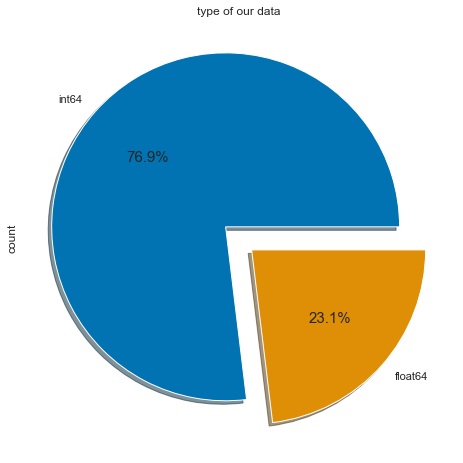

In [16]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of our data');

In [17]:
train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [18]:
train.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [19]:
train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# DATA VISUALIZATION

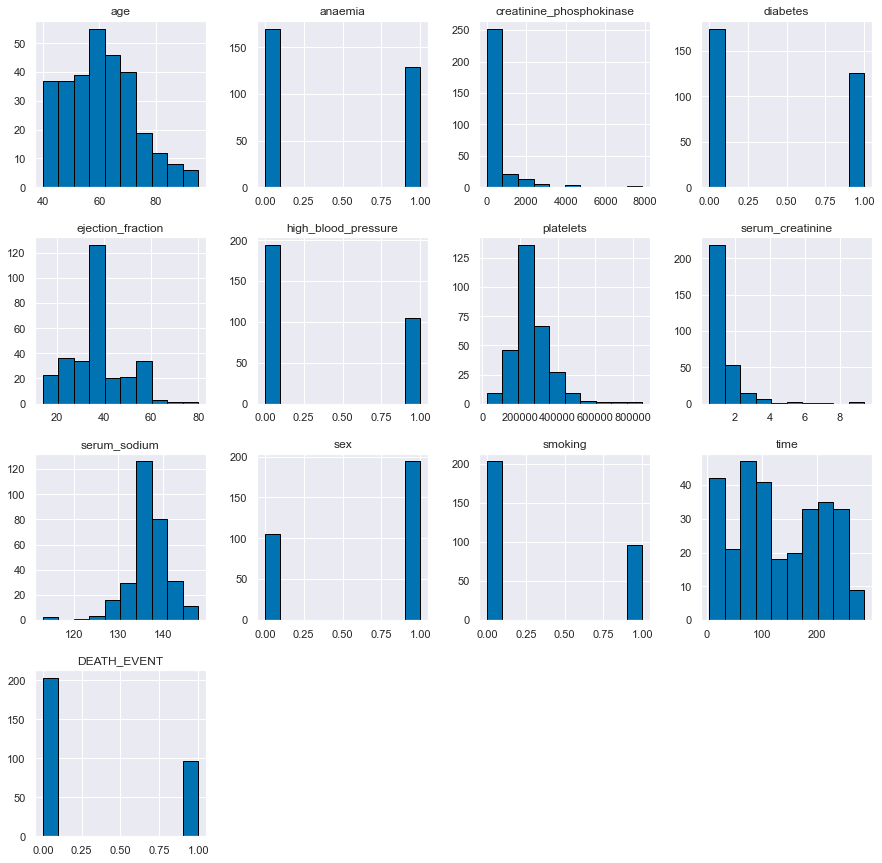

In [24]:
train.hist(figsize=(15,15),edgecolor='black')
plt.show()

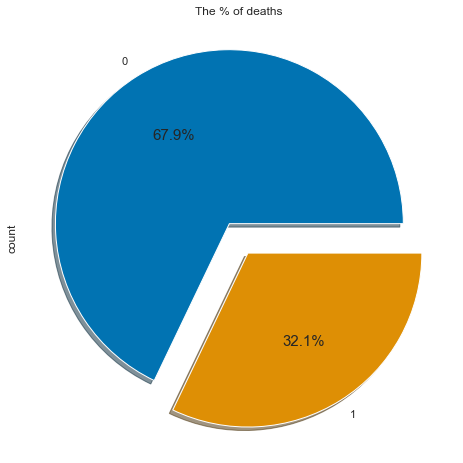

In [28]:
train.DEATH_EVENT.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('The % of deaths')
plt.show()

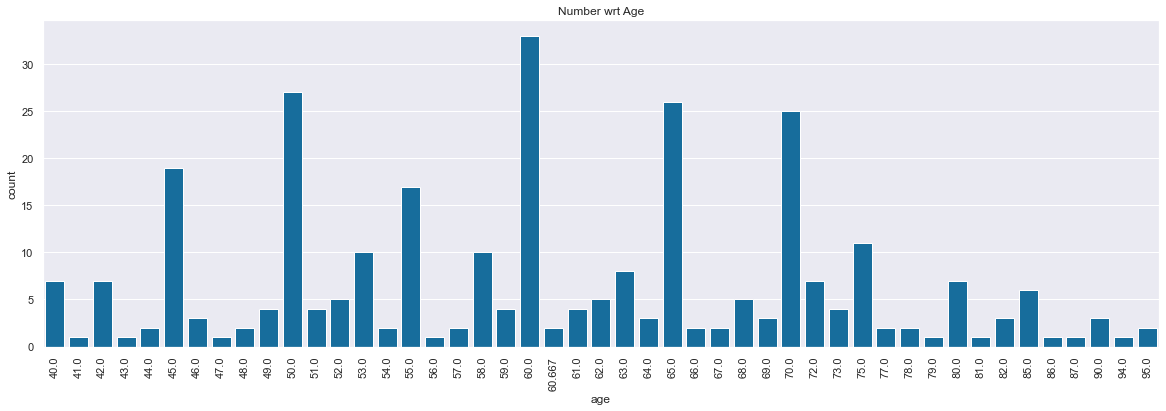

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x='age',data=train)
plt.xticks(rotation=90)
plt.title('Number wrt Age')
plt.show()

In [32]:
# Distribution of Age


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()

In [33]:
# Distribution of AGE Vs DEATH_EVENT

fig = px.histogram(train, x="age", color="DEATH_EVENT", marginal="violin", hover_data=train.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly",
                   
                   
                  )
fig.show()

<AxesSubplot:ylabel='count'>

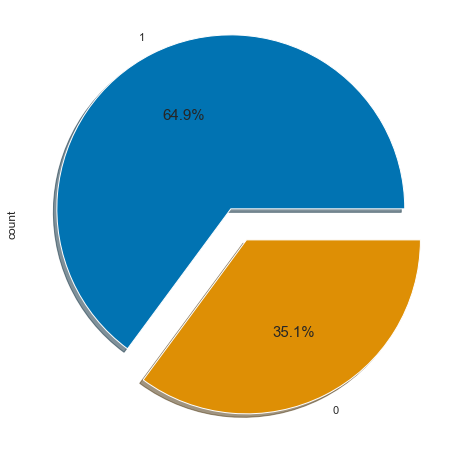

In [34]:
train.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

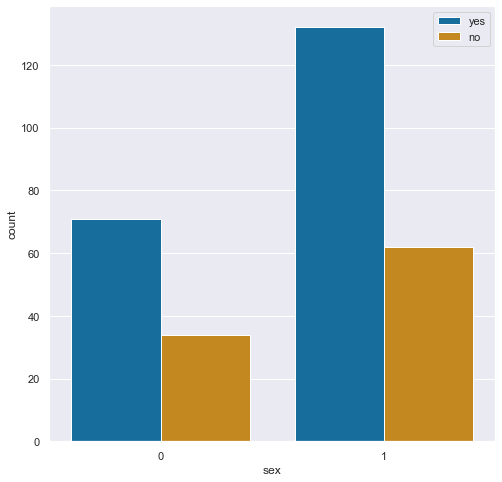

In [35]:
sns.countplot(x='sex',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no'])
plt.show()

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==1)]
d2 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==1)]
d3 = train[(train["DEATH_EVENT"]==0) & (train["sex"]==0)]
d4 = train[(train["DEATH_EVENT"]==1) & (train["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]

values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()


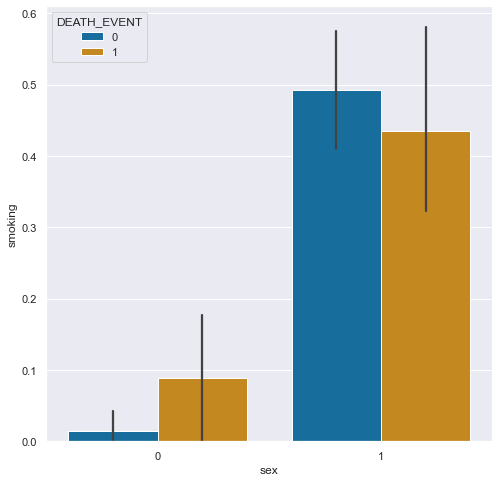

In [38]:
sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=train);

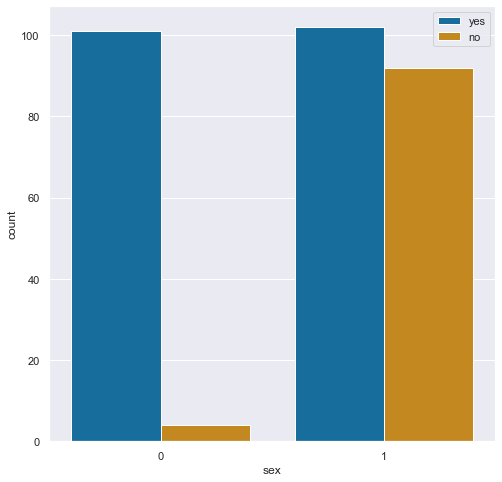

In [41]:
sns.countplot(x='sex',hue='smoking',data=train)
plt.legend(['yes','no']);

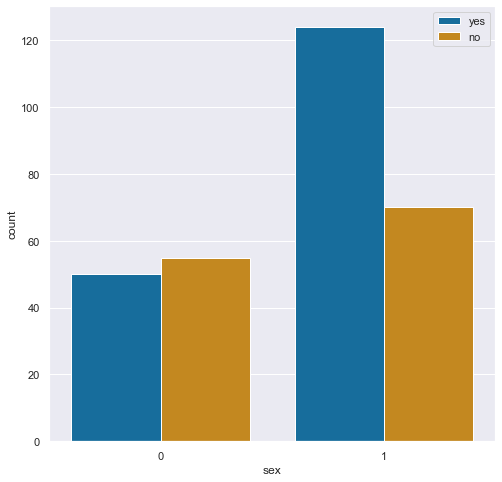

In [42]:
sns.countplot(x='sex',hue='diabetes',data=train)
plt.legend(['yes','no']);

<AxesSubplot:ylabel='count'>

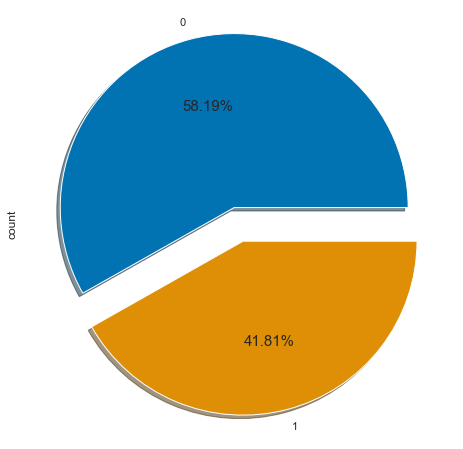

In [43]:
train.diabetes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%2.2f%%',shadow=True)

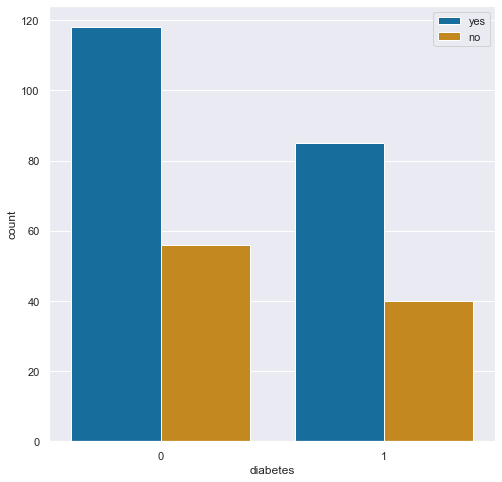

In [44]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=train)
plt.legend(['yes','no']);

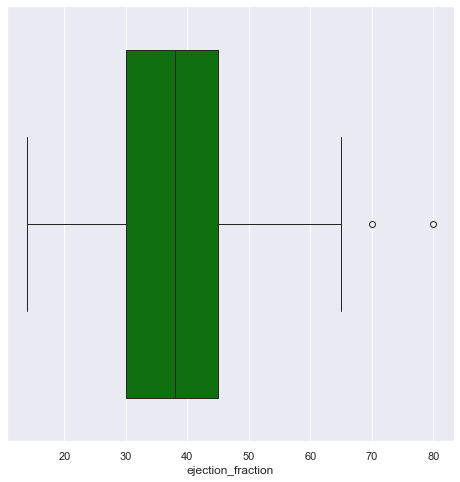

In [45]:
sns.boxplot(x = train.ejection_fraction, color = 'green')
plt.show()

In [46]:
train[train['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [47]:
train = train[train['ejection_fraction']<70]

In [48]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = train['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly_dark'
)

fig.show()

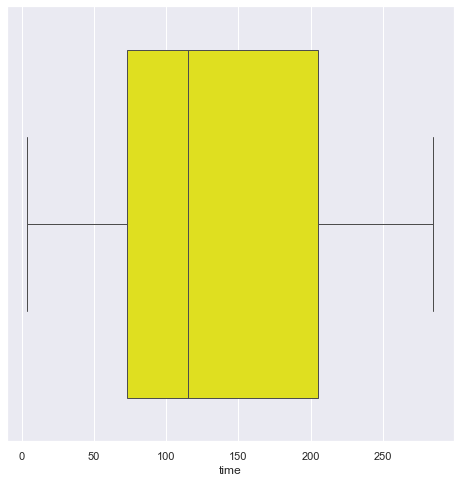

In [49]:
sns.boxplot(x=train.time, color = 'yellow')
plt.show()

In [50]:
train.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.086948,-0.082190,-0.107099,0.084417,0.093342,-0.054911,0.191524,-0.045582,0.057253,0.014322,-0.227676,0.255490
anaemia,0.086948,1.000000,-0.190798,-0.012010,0.032726,0.031050,-0.039589,0.025823,0.041949,-0.094417,-0.107192,-0.148080,0.059143
creatinine_phosphokinase,-0.082190,-0.190798,1.000000,-0.010119,-0.044131,-0.070146,0.023900,-0.013776,0.059600,0.079560,0.002055,-0.008914,0.063787
diabetes,-0.107099,-0.012010,-0.010119,1.000000,0.013474,-0.011024,0.089323,-0.029428,-0.089284,-0.166931,-0.151707,0.033835,0.000246
ejection_fraction,0.084417,0.032726,-0.044131,0.013474,1.000000,0.021671,0.085759,-0.086869,0.180255,-0.124787,-0.054795,0.046043,-0.284516
high_blood_pressure,0.093342,0.031050,-0.070146,-0.011024,0.021671,1.000000,0.055548,-0.043270,0.037080,-0.102811,-0.054573,-0.203749,0.071639
platelets,-0.054911,-0.039589,0.023900,0.089323,0.085759,0.055548,1.000000,-0.014142,0.062595,-0.131498,0.025668,0.013844,-0.043820
serum_creatinine,0.191524,0.025823,-0.013776,-0.029428,-0.086869,-0.043270,-0.014142,1.000000,-0.211363,0.044205,-0.012007,-0.189343,0.286439
serum_sodium,-0.045582,0.041949,0.059600,-0.089284,0.180255,0.037080,0.062595,-0.211363,1.000000,-0.026957,0.005215,0.087865,-0.196280
sex,0.057253,-0.094417,0.079560,-0.166931,-0.124787,-0.102811,-0.131498,0.044205,-0.026957,1.000000,0.443064,-0.015836,-0.000817


# SPLIT THE DATA

In [51]:
# Feature Selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.iloc[:, :-1]
y = train.iloc[:,-1]

C:\Users\91825\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



[0.09373484 0.02373029 0.07543491 0.02919557 0.12873983 0.02359706
 0.07269782 0.11917547 0.0850989  0.02715379 0.02524241 0.29619911]


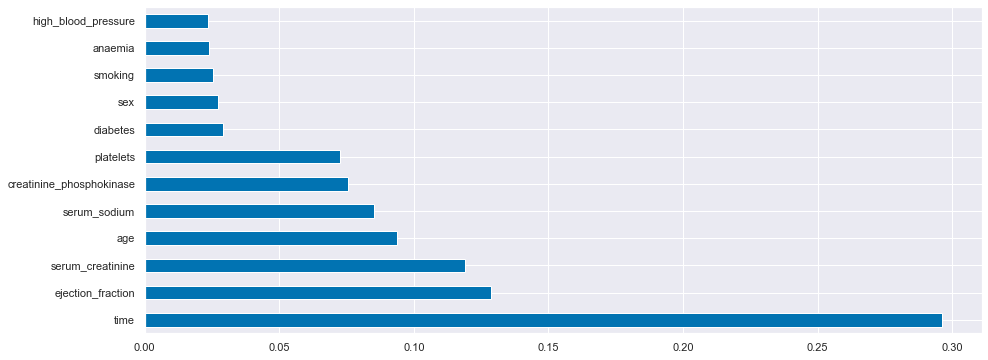

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# Drope Some Feature from Dataset

In [53]:
train=train.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [54]:
train.corr()

,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
ejection_fraction,1.000000,-0.086869,0.180255,0.046043,-0.284516
serum_creatinine,-0.086869,1.000000,-0.211363,-0.189343,0.286439
serum_sodium,0.180255,-0.211363,1.000000,0.087865,-0.196280
time,0.046043,-0.189343,0.087865,1.000000,-0.536734
DEATH_EVENT,-0.284516,0.286439,-0.196280,-0.536734,1.000000


In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [56]:
x=train.drop('DEATH_EVENT',axis=1)
y=train.DEATH_EVENT

In [57]:
print(x.shape)
print(y.shape)

(297, 4)
(297,)


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [59]:
print(x_train)
print(y_test)

     ejection_fraction  serum_creatinine  serum_sodium  time
156                 35               1.4           136   120
124                 40               3.7           134    96
187                 25               2.1           144   172
208                 40               1.0           141   187
253                 35               1.2           132   215
..                 ...               ...           ...   ...
0                   20               1.9           130     4
174                 35               0.9           137   146
171                 40               0.9           140   146
273                 40               0.7           140   245
29                  30               1.2           132    26

[207 rows x 4 columns]
13     1
66     1
74     1
147    0
94     0
      ..
285    0
218    0
267    0
70     0
260    0
Name: DEATH_EVENT, Length: 90, dtype: int64


# Standarization

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

C:\Users\91825\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\91825\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

C:\Users\91825\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



# LogisticRegression

In [61]:
# Making Confusion Matrix and calculating accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg)

[[53  9]
 [12 16]]
0.7666666666666667


# KNN Classifier

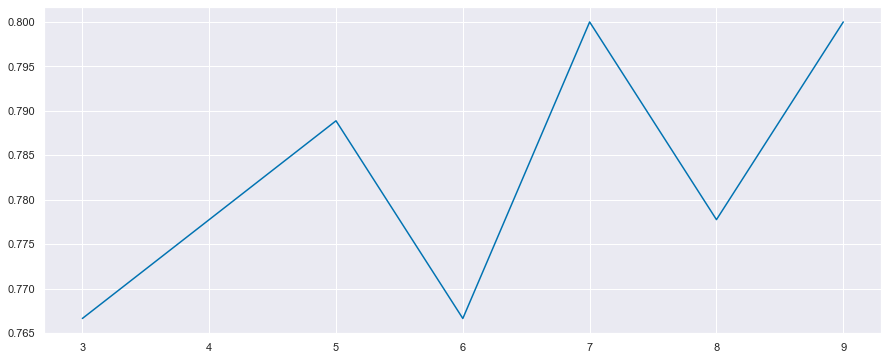

In [62]:
# Finding the optimum number of neighbors 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(3,10):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,10)), list1)
plt.show()

In [63]:
# Training the K Nearest Neighbor Classifier on the Training set

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [64]:
# Predicting the Test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]


In [65]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[56  6]
 [13 15]]
0.7888888888888889


# Support Vector Machine

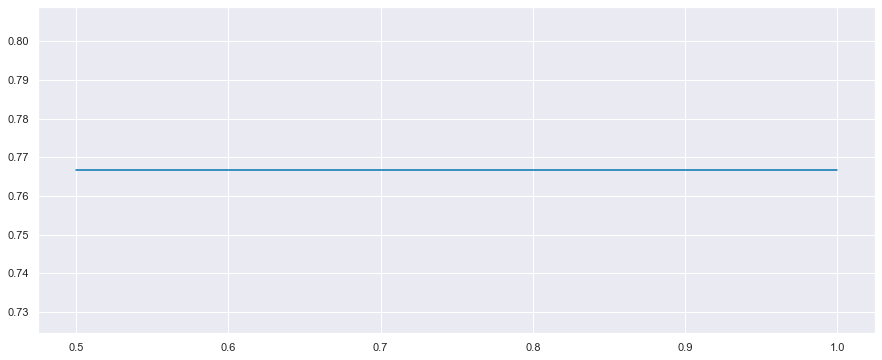

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [67]:
# Training the Support Vector Classifier on the Training set

from sklearn.svm import SVC
classifier = SVC(C = 0.7, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.7, random_state=0)

In [68]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]


In [69]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc)
mylist.append(acc_svc)

[[56  6]
 [15 13]]
0.7666666666666667


# DecisionTree

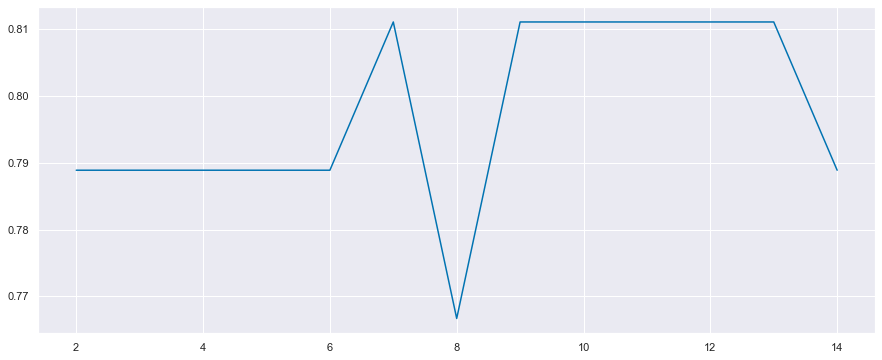

In [70]:
# Finding the optimum number of max_leaf_nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [73]:
# Training the Decision Tree Classifier on the Training set

classifier = DecisionTreeClassifier(max_leaf_nodes = 10, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [74]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0]


In [75]:
# Making the confusion matrix and calculating accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[51 11]
 [ 6 22]]
0.8111111111111111


# RandomForest

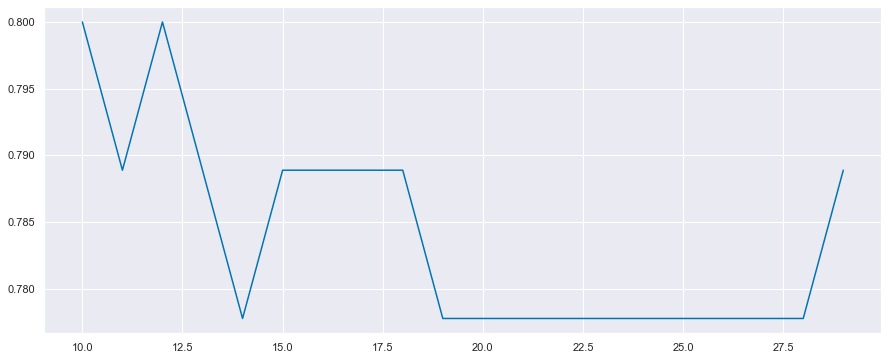

In [76]:
#Finding the optimum number of n_estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [78]:
# Training the RandomForest Classifier on the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [79]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0]


In [80]:
# Making the confusion matrix and calculating the accuracy score

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[53  9]
 [10 18]]
0.7888888888888889


# Artificial Neural Network

In [81]:
np.random.seed(0)
import tensorflow as tf

# Initialising the ANN

ann = tf.keras.models.Sequential()

In [63]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [82]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [83]:
# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [84]:
# Adding the fourth hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

In [85]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [86]:
# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

In [87]:
# Training the ANN on the training set

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.7140 - accuracy: 0.4010
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6232
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.8019
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6377 - accuracy: 0.8406
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.8454
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.8454
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.8502
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.8357
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.8454
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5657 - accuracy: 0.8454
Epoch 11/

13/13 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8937
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8986
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2883 - accuracy: 0.8986
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8986
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9034
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8986
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2877 - accuracy: 0.8986
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8986
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.9034
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.9034
Epoch 93/100


In [88]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 2ms/step


In [89]:
# Making the confusion matrix, calculating accuracy_score 

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Confusion Matrix
[[55  7]
 [12 16]]

Accuracy
0.7888888888888889


# Accuracy Compare 

In [90]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'ANN',   
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, acc_decisiontree
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,0.811111
1,KNN,0.788889
3,Random Forest,0.788889
4,ANN,0.788889
0,Support Vector Machines,0.766667
2,Logistic Regression,0.766667


C:\Users\91825\AppData\Local\Temp/ipykernel_17552/807876981.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




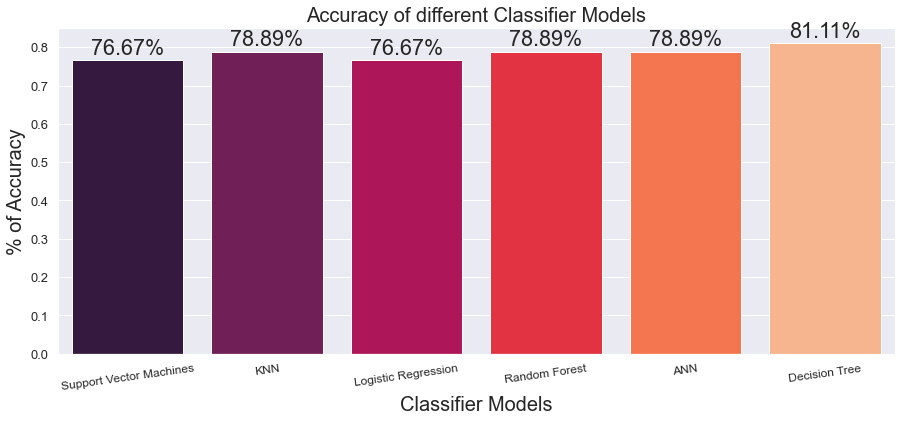

In [91]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()